In [35]:
import yfinance as yf
import pandas as pd

# Download last 5 years of daily stock prices for Apple
data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")

# Save to CSV (optional)
data.to_csv("AAPL.csv")

# View the first few rows of the data
data.head()
# Create lag features (e.g., previous 7 days)
for i in range(1, 8):
    data[f'Lag_{i}'] = data['Close'].shift(i)

# Drop rows with missing values (due to shifting)
data = data.dropna()

# View the first few rows with lag features
data.head()
from sklearn.model_selection import train_test_split

# Select 'Close' price for prediction
X = data.drop('Close', axis=1)  # Features (lags)
y = data['Close']  # Target (close price)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
from sklearn.preprocessing import MinMaxScaler

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# View the scaled data
print(X_train_scaled[:5])


[*********************100%***********************]  1 of 1 completed

[[0.04468967 0.0501791  0.04605793 0.08734093 0.04857468 0.0486396
  0.04867202 0.04972563 0.04653224 0.04523537 0.045284  ]
 [0.04771948 0.05209644 0.04863213 0.15738217 0.05017961 0.04857468
  0.0486396  0.04867202 0.04972563 0.04653224 0.04523537]
 [0.05100847 0.0529063  0.05141673 0.20041918 0.05311367 0.05017961
  0.04857468 0.0486396  0.04867202 0.04972563 0.04653224]
 [0.05078162 0.05113769 0.04858347 0.2504402  0.05165468 0.05311367
  0.05017961 0.04857468 0.0486396  0.04867202 0.04972563]
 [0.05215884 0.05639391 0.05379665 0.21730591 0.05637187 0.05165468
  0.05311367 0.05017961 0.04857468 0.0486396  0.04867202]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 48.89332878353441
R-squared: 0.8724112432656986


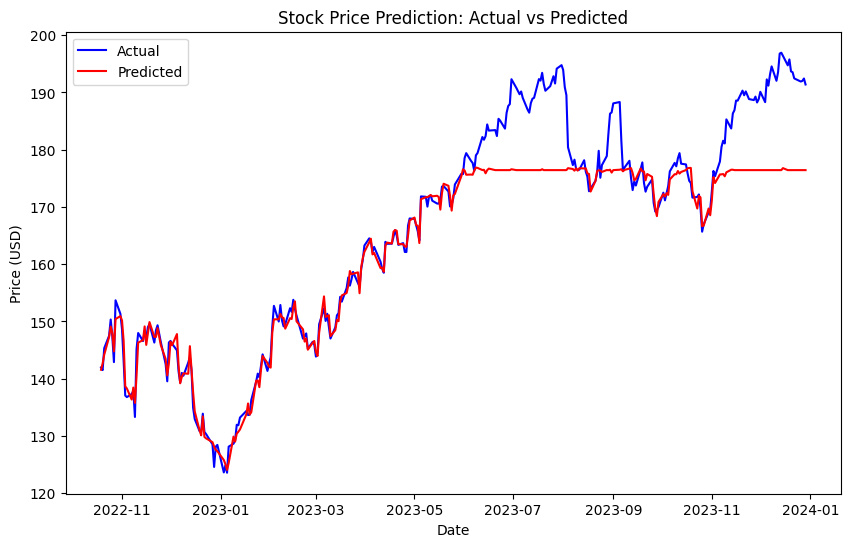

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict the stock prices
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.legend()
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print(f'Best parameters: {grid_search.best_params_}')


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters: {'max_depth': 20, 'n_estimators': 100}


In [38]:
# Use the best parameters found by GridSearchCV
best_model = grid_search.best_estimator_

# Train the model
best_model.fit(X_train_scaled, y_train)

# Predict the stock prices
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model Mean Squared Error: {mse_best}')
print(f'Best Model R-squared: {r2_best}')


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Model Mean Squared Error: 48.89332878353441
Best Model R-squared: 0.8724112432656986


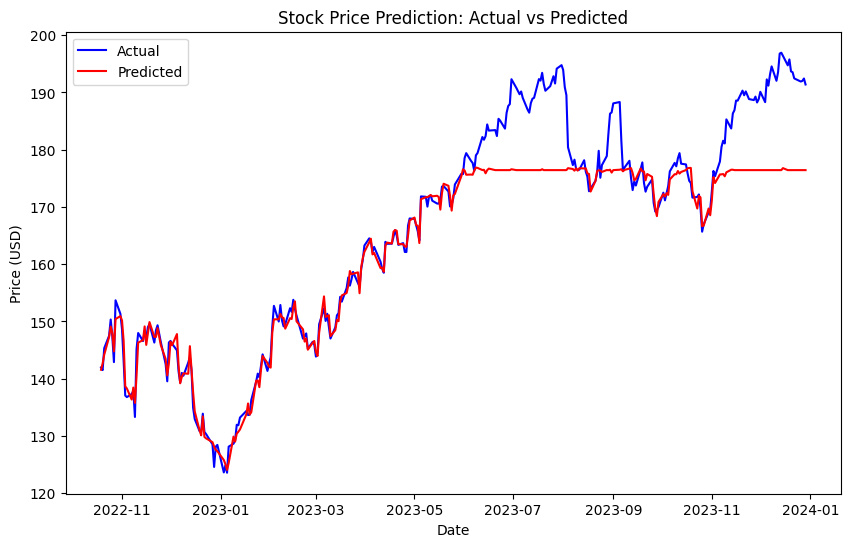

In [39]:
# Plot actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_best, label='Predicted', color='red')
plt.legend()
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


XGBoost Mean Squared Error: 45.439693450927734
XGBoost R-squared: 0.8814235925674438


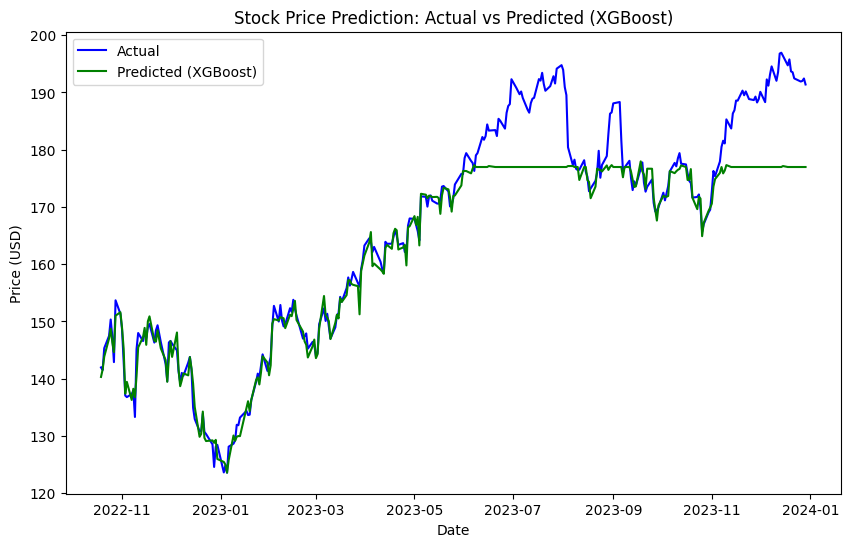

In [40]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=20, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict the stock prices
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

# Plot actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='Predicted (XGBoost)', color='green')
plt.legend()
plt.title('Stock Price Prediction: Actual vs Predicted (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP Mean Squared Error: 14.554505838751886
MLP R-squared: 0.9620195361811026


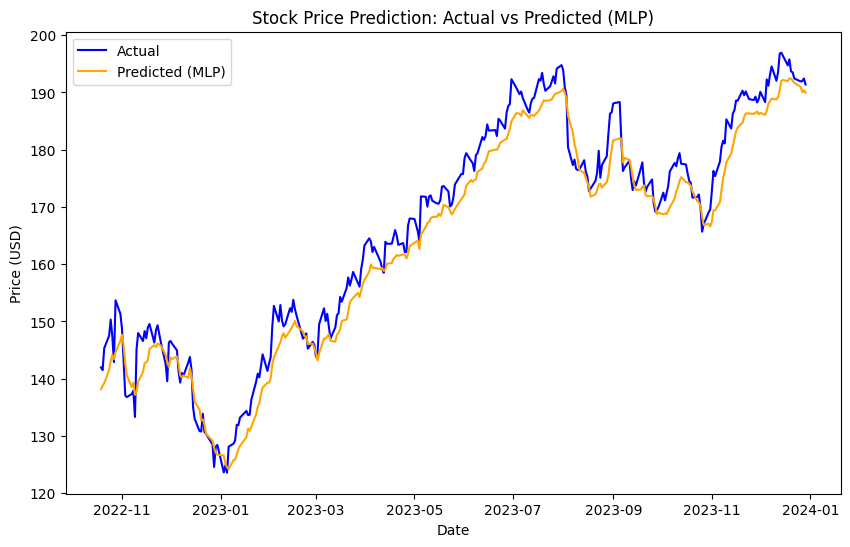

In [41]:
from sklearn.neural_network import MLPRegressor

# Initialize the model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Predict the stock prices
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'MLP Mean Squared Error: {mse_mlp}')
print(f'MLP R-squared: {r2_mlp}')

# Plot actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_mlp, label='Predicted (MLP)', color='orange')
plt.legend()
plt.title('Stock Price Prediction: Actual vs Predicted (MLP)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


In [42]:
import joblib

# Save the trained MLP model
joblib.dump(mlp_model, "mlp_stock_model.pkl")

# Optionally, save the scaler too
joblib.dump(scaler, "scaler.pkl")
mlp_model_loaded = joblib.load("mlp_stock_model.pkl")
scaler_loaded = joblib.load("scaler.pkl")
# Example: Predict using the most recent available feature set
latest_data = X_test_scaled[-1].reshape(1, -1)  # Latest row reshaped
predicted_price = mlp_model.predict(latest_data)

print(f"Predicted next price: ${predicted_price[0]:.2f}")


Predicted next price: $189.96
